Inspired by [this awesome kernel](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile) and material from [this awesome book](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291)

## Survey Results

![](../readme_images/survey_11032021_2.jpeg)

![](../readme_images/survey_11032021_1.jpeg)

## Objective (what will I do for you today?)

1. Share a simplified version of a typical process of developing a Machine Learning solution
2. Share some of the techniques, algorithms, technologies involved
3. Share key things to keep in mind when developing a Machine Learning solution

### In other words, turn some unknown unknowns and known unknowns into known knowns

## What I hope you will do today?

- Not care about the code so much (that is easy to find on Google/Stack Overflow)
- Ask questions...as many as you want
- Get a general idea of what an end-to-end ML project lifecycle looks like

# Let's get started!

## Overview
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning
algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

![](https://cdn.dribbble.com/users/449626/screenshots/3679748/bike_sharing.gif)

## Scenario

You are a member of of the Data Science team of a bike sharing company called **BRAG** (Bike Riding Association Global...nothing to do with Grab :P) and you are approached by the Head of Reginoal Operations.

![](../readme_images/1.png)

We will use Machine Learning to predict demand for bikes. We are going to need a few things:
1. Past data of bike demand
2. Corresponding features to build the model

![](../readme_images/3.png)

Machine Learning: A computer program is said to learn from experience E with respect to some task T
and some performance measure P, if its performance on T, as measured by P, improves
with experience E. (Tom Mitchell 1997)

We need the count of the number of bikes in the past which we can use along with the features to predict future demand.

Features are factors that affect bike demand. For example, the weather can be a factor. If its raining, maybe the demand for bikes will go down.

![](../readme_images/4.png)

Machine Learning is great for:
- Problems for which existing solutions require a lot of hand-tuning or long lists of
rules: one Machine Learning algorithm can often simplify code and perform better.
- Complex problems for which there is no good solution at all using a traditional
approach: the best Machine Learning techniques can find a solution.
- Fluctuating environments: a Machine Learning system can adapt to new data.
- Getting insights about complex problems and large amounts of data.

![](https://miro.medium.com/max/1200/1*9Eu_-DDMZ_bP_t94_MMEYA.png)

- In supervised learning, the training data you feed to the algorithm includes the desired
solutions, called labels
    - A typical supervised learning task is classification. The spam filter is a good example
of this: it is trained with many example emails along with their class (spam or ham),
and it must learn how to classify new emails.
![](https://images-na.ssl-images-amazon.com/images/I/71aUEfVSLgL.jpg)
    - Another typical task is to predict a target numeric value, such as the price of a car,
given a set of features (mileage, age, brand, etc.) called predictors.
![](https://i.kym-cdn.com/entries/icons/original/000/029/959/Screen_Shot_2019-06-05_at_1.26.32_PM.jpg)
- In unsupervised learning, as you might guess, the training data is unlabeled
- In reinforcement learning, the learning system, called an agent
in this context, can observe the environment, select and perform actions, and get
rewards in return

Our task is a regression task since we are trying to predict a number (number of bikes in demand). Also, our task is supervised because we will use the 'correct' answers/labels to train our model.

![](https://media4.giphy.com/media/26gryENPPBBrNo2dy/giphy.gif)

https://towardsdatascience.com/what-the-f-8fb700b5044f

Other important things to find out:
1. How will the solution be used?
2. What is the current solution?
3. How much better than the current solution do we need to do?

## EDA

In [1]:
import pandas as pd
import calendar
from datetime import datetime
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

### Data Summary

In [2]:
df = pd.read_csv("../data/bike_sharing_data.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Adding New Features

In [6]:
df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["weekday"] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df["month"] = df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


### Correlation between Features

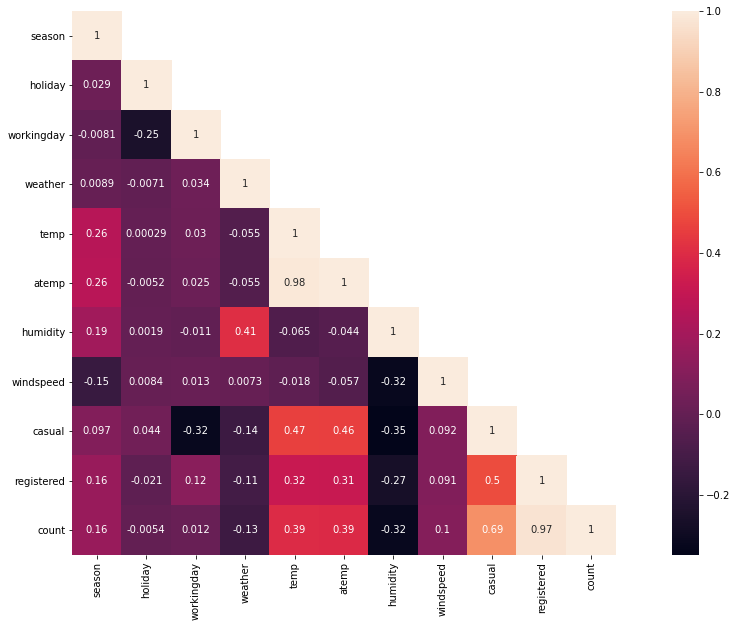

In [8]:
corr_matrix = df[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'hour', 'weekday', 'month']].corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr_matrix, mask=mask, square=True,annot=True)


In [9]:
# df_date = df.groupby('date').mean()
# df_date.reset_index(inplace=True)

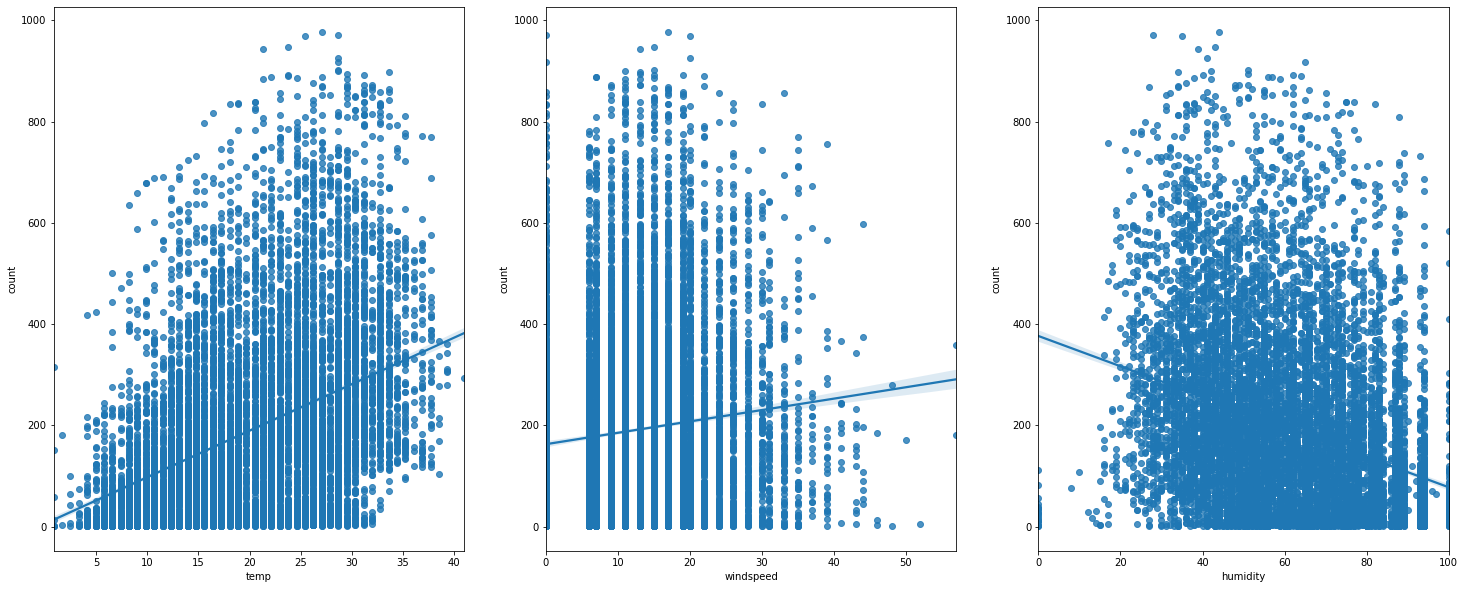

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(25, 10)
sns.regplot(x="temp", y="count", data=df,ax=ax1)
sns.regplot(x="windspeed", y="count", data=df,ax=ax2)
sns.regplot(x="humidity", y="count", data=df,ax=ax3)

![](../readme_images/5.png)

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

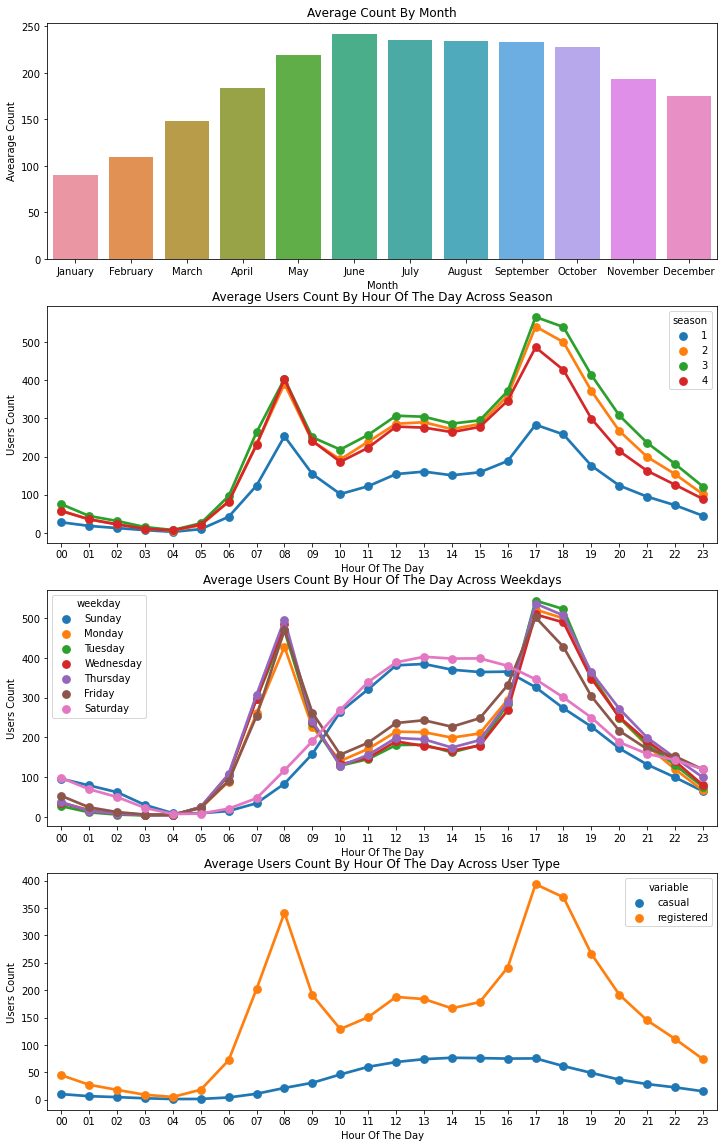

In [11]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')